<a href="https://colab.research.google.com/github/hbbspace/PVCK_2024/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**
1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

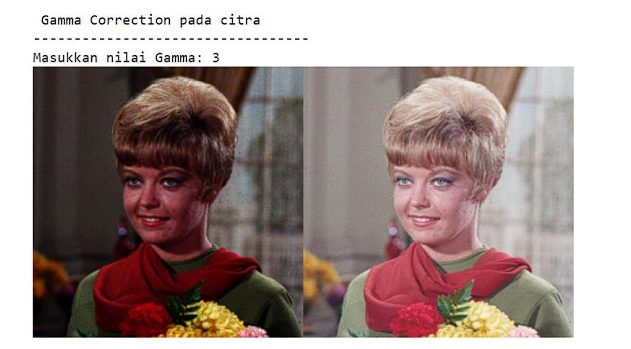

 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


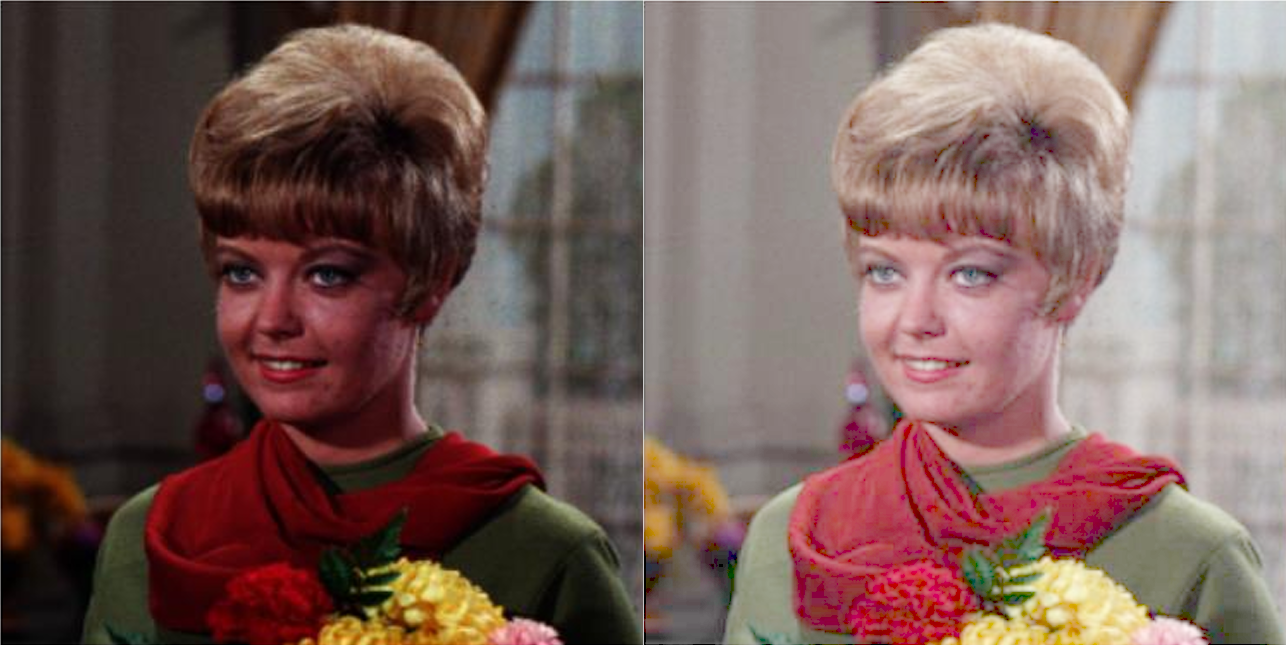

In [1]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

female1 = cv.imread('/content/Female.png')

imgTgs1 = female1.copy()

def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(image=imgTgs1, gamma=gamma)
cv2_imshow(np.hstack([imgTgs1, adjusted]))

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

```
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
```
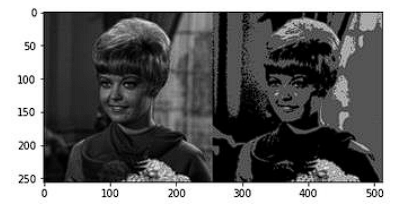



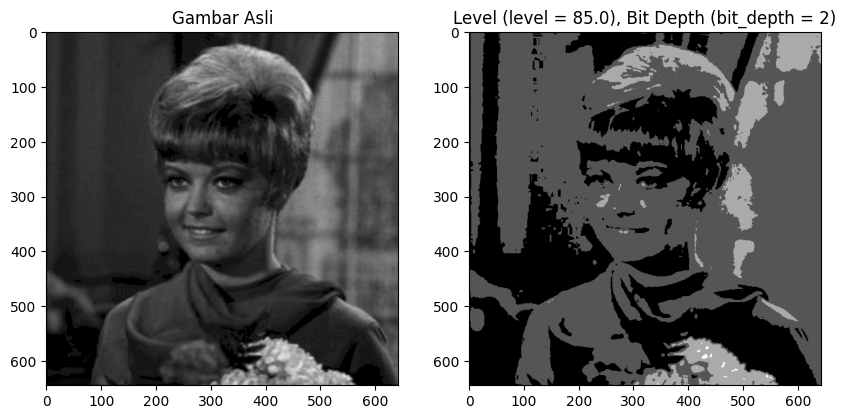

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/Female.png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(depth_image, cv.COLOR_BGR2RGB))
plt.title(f'Level (level = {level}), Bit Depth (bit_depth = {bit_depth})')

plt.show()

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).  


```
#cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)
```


Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.

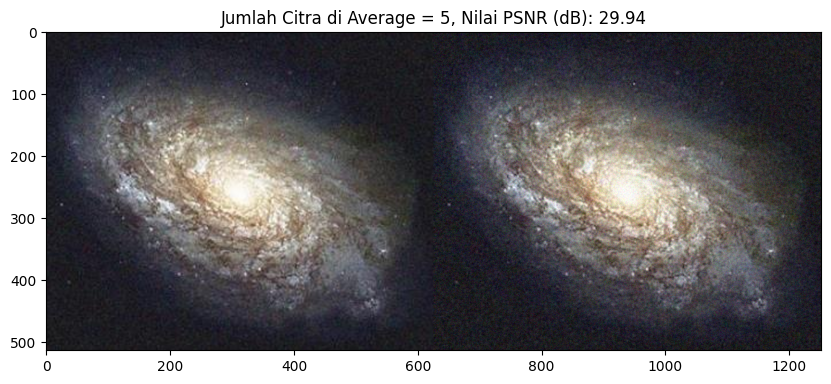

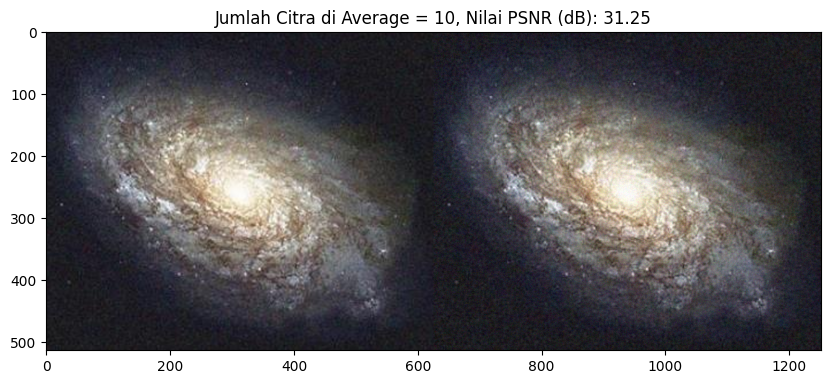

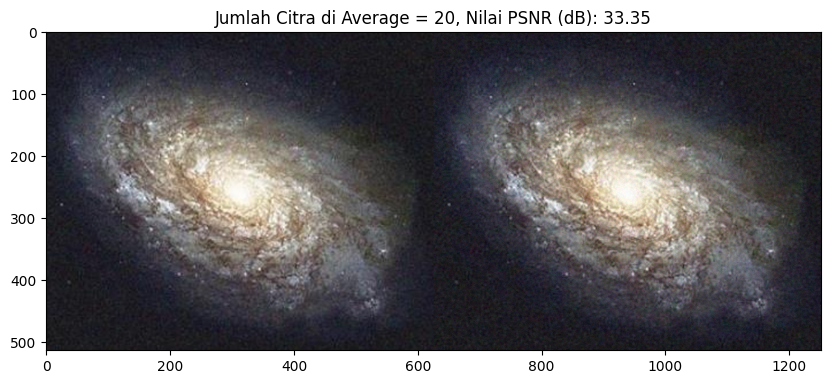

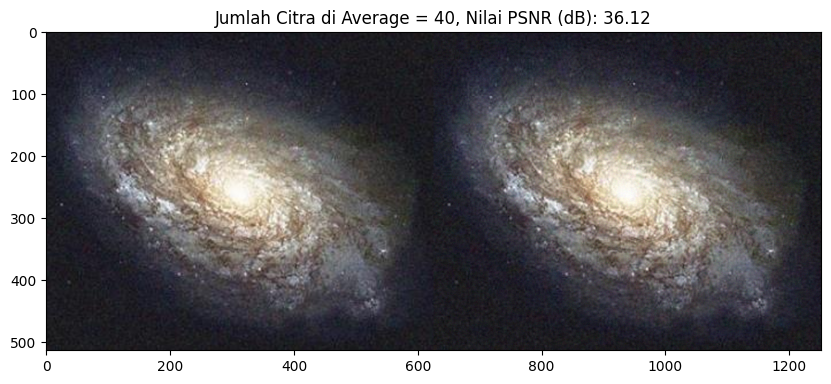

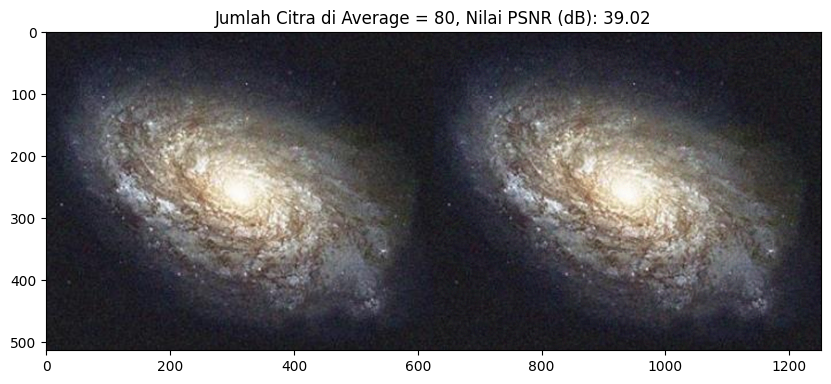

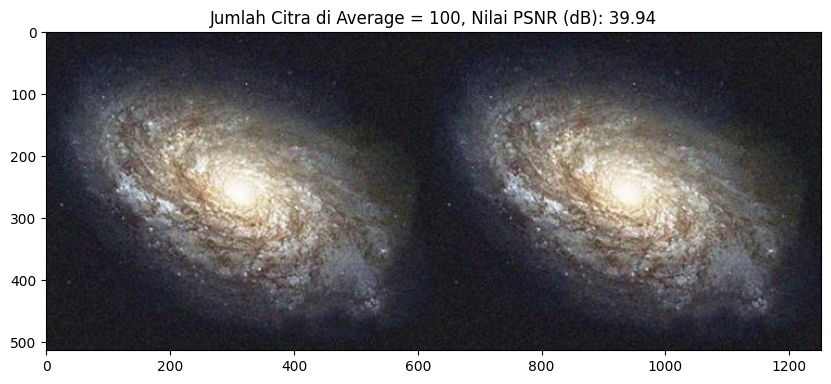

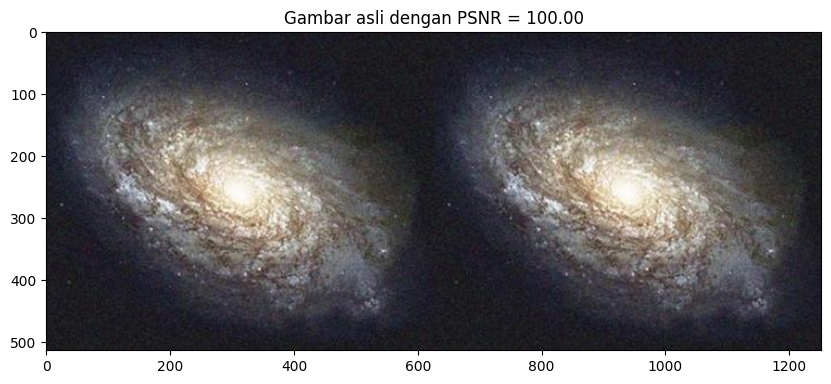

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)  # Menghitung Mean Squared Error (MSE)
    if mse == 0:  # Jika tidak ada noise, PSNR mencapai maksimum
        psnr = 100
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Memuat gambar asli
original = cv.imread('/content/Galaxy.png')

# Cek apakah gambar asli berhasil dimuat
if original is None:
    print("Error: Gambar asli tidak ditemukan atau path salah.")
else:
    # Daftar jumlah gambar dengan level noise berbeda yang akan di-average
    list_img = [5, 10, 20, 40, 80, 100]

    for img_count in list_img:
        # Membuat array kosong untuk menampung rata-rata gambar dengan noise
        average_noise = np.zeros_like(original, dtype=np.float32)

        # Menambahkan noise Gaussian pada gambar asli
        for i in range(1, img_count + 1):
            # Membuat Gaussian noise dengan mean=0 dan variance=25
            noise = np.random.normal(0, 25, original.shape).astype(np.float32)

            # Menambahkan noise ke gambar asli
            noisy_image = original.astype(np.float32) + noise

            # Merata-ratakan gambar noisy
            average_noise += noisy_image

        # Merata-ratakan gambar yang diakumulasi
        average_noise /= img_count

        # Mengubah gambar yang telah dirata-ratakan kembali ke format uint8
        average_noise = np.clip(average_noise, 0, 255).astype(np.uint8)

        # Menghitung PSNR antara gambar asli dan gambar noisy yang dirata-ratakan
        psnr = PSNR(original, average_noise)

        # Menggabungkan gambar asli dan gambar noisy yang dirata-ratakan secara horizontal
        final_frame = cv.hconcat([original, average_noise])

        # Menampilkan gambar
        plt.figure(figsize=(10, 5))
        plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB agar tampilan benar
        plt.title(f"Jumlah Citra di Average = {img_count}, Nilai PSNR (dB): {psnr:.2f}")
        plt.show()

    # PSNR antara gambar asli dan gambar yang dirata-rata (seharusnya PSNR tertinggi)
    psnr = PSNR(original, original)
    final_frame = cv.hconcat([original, original])

    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB untuk tampilan yang benar
    plt.title(f"Gambar asli dengan PSNR = {psnr:.2f}")
    plt.show()

# **Kesimpulan**

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:
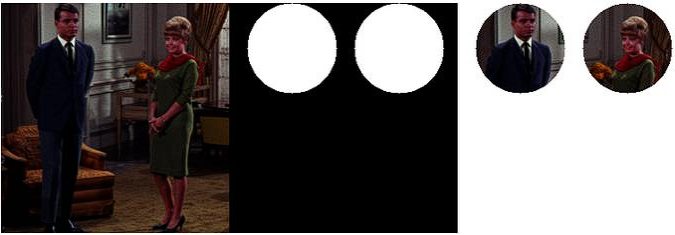


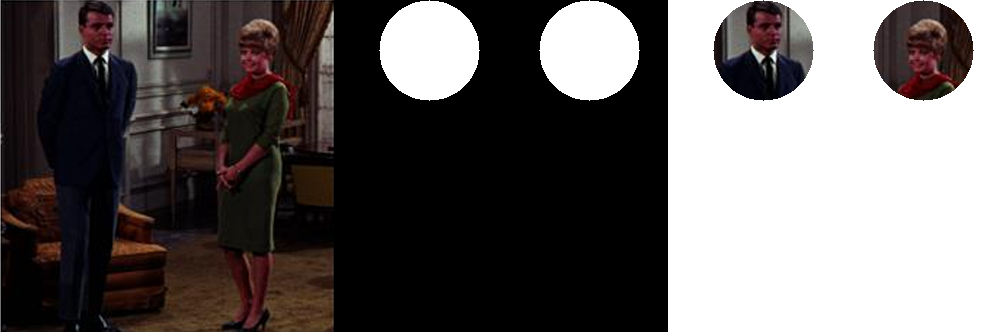

In [26]:
couple = cv.imread('/content/Couple.png')

imgTgs4 = couple.copy()
imgTgs4 = cv.cvtColor(imgTgs4, cv.COLOR_BGR2RGB)


maskingImg = np.zeros(imgTgs4.shape, dtype=np.uint8)
maskingImg = cv.circle(maskingImg, (95, 50), 50, (255,255,255), -1)
maskingImg = cv.circle(maskingImg, (255, 50), 50, (255,255,255), -1)

result = cv.bitwise_and(imgTgs4, maskingImg)
result[maskingImg==0] = 255

imgTgs4 = cv.cvtColor(imgTgs4, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv2_imshow(cv.hconcat([imgTgs4, maskingImg, result]))

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

*   **Not**

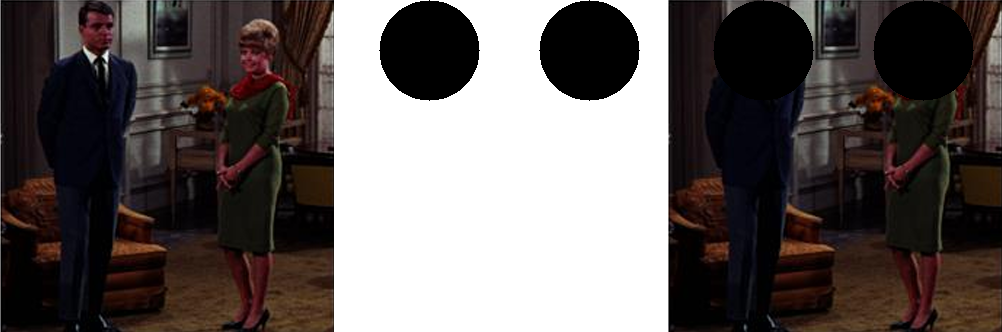

In [27]:
maskingImgNot = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgNot = cv.circle(maskingImgNot, (95, 50), 50, 255, -1)
maskingImgNot = cv.circle(maskingImgNot, (255, 50), 50, 255, -1)

combine = cv.bitwise_not(maskingImgNot)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

*   **OR**



maskingImgOr = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgOr2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgOr = cv.circle(maskingImgOr, (95, 50), 50, 255, -1)
maskingImgOr2 = cv.circle(maskingImgOr2, (185, 50), 50, 255, -1)

combine = cv.bitwise_or(maskingImgOr, maskingImgOr2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

*   **And**



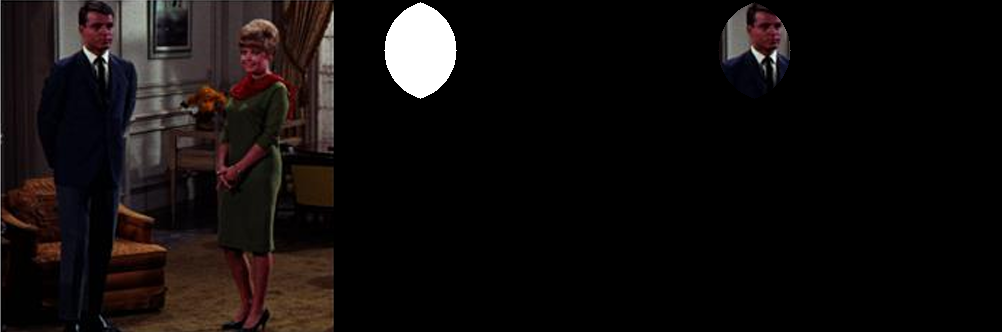

In [7]:
maskingImgAnd = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgAnd2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgAnd = cv.circle(maskingImgAnd, (95, 50), 50, 255, -1)
maskingImgAnd2 = cv.circle(maskingImgAnd2, (155, 50), 50, 255, -1)

combine = cv.bitwise_and(maskingImgAnd, maskingImgAnd2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

*  **Nand**




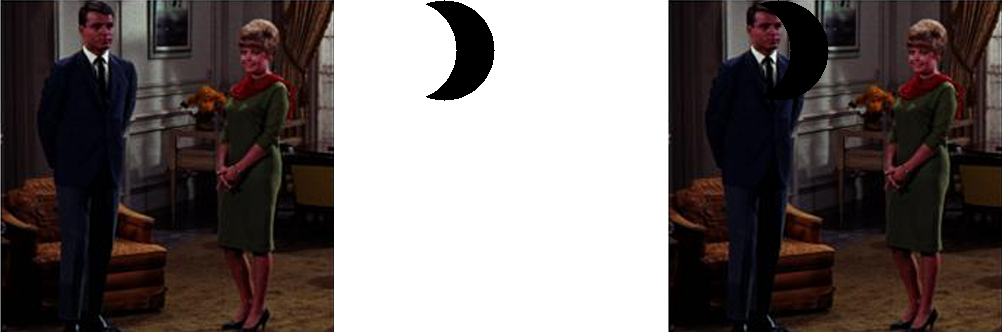

In [8]:
maskingImgNand = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgNand2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgNand = cv.circle(maskingImgNand, (95, 50), 50, 255, -1)
maskingImgNand2 = cv.circle(maskingImgNand2, (165, 50), 50, 255, -1)

combine = cv.bitwise_or(maskingImgNand, cv.bitwise_not(maskingImgNand2))

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

*  **XOR**

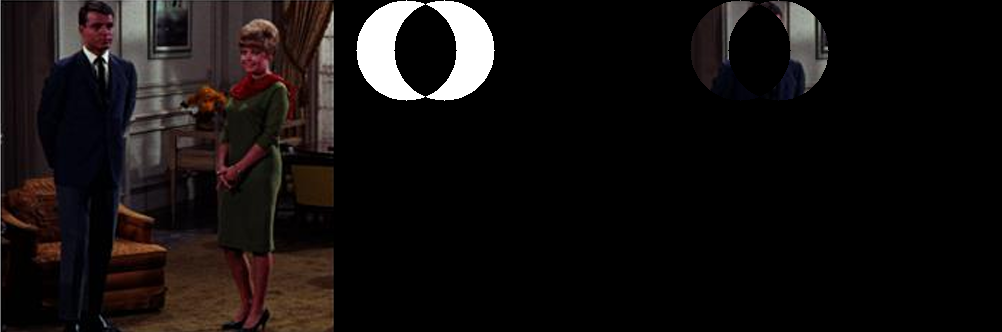

In [9]:
maskingImgXor = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgXor2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgXor = cv.circle(maskingImgXor, (95, 50), 50, 255, -1)
maskingImgXor2 = cv.circle(maskingImgXor2, (165, 50), 50, 255, -1)

combine = cv.bitwise_xor(maskingImgXor, maskingImgXor2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

## **Hasil Analisa**
*   **Operator NOT (Komplemen):**  
    Pada operator ini, area di luar lingkaran akan tetap menampilkan bagian dari citra asli, sedangkan area di dalam lingkaran menjadi hitam. Hal ini terjadi karena mask di dalam lingkaran terinversi, sehingga hanya area di luar lingkaran yang dipertahankan.

*   **Operator OR (Atau):**  
    Dalam operator OR, lingkaran akan muncul berwarna putih, dan bagian di dalam lingkaran menampilkan citra asli. Area di luar lingkaran akan berwarna hitam. Dengan kata lain, operator OR akan mempertahankan citra di dalam lingkaran, tetapi menghilangkan bagian luar lingkaran.

*   **Operator AND (Dan):**
    Operator AND hanya menampilkan area di mana kedua lingkaran tumpang tindih. Bagian yang tumpang tindih akan muncul berwarna putih, menunjukkan bahwa operator ini hanya mengambil bagian yang muncul di kedua mask sekaligus.

*   **Operator NAND (Not And):**
    Dalam operator NAND, bagian yang tumpang tindih dari kedua lingkaran akan dihilangkan dan berwarna hitam, sementara area lain tetap menampilkan bagian dari citra asli. Operator ini bekerja dengan cara membalik hasil dari operator AND.

* **Operator XOR (Exclusive Or):**
    Operator XOR mengambil bagian dari kedua lingkaran yang tidak tumpang tindih. Hanya bagian di luar irisan lingkaran (bagian unik dari masing-masing lingkaran) yang akan muncul berwarna putih. Bagian tumpang tindih tidak ditampilkan, menunjukkan bahwa operator ini hanya mempertahankan elemen yang unik dari masing-masing mask.




